In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

#import missingno as msno 
#import pandas_profiling

import gc
import datetime

%matplotlib inline
color = sns.color_palette()

In [3]:
df = pd.read_excel("ventas_productos_celulares.xlsx")

In [4]:
df.head(10)

,Producto,Cantidad vendida,Día de la semana de venta,Precio,Vendido
0,Micas protectoras,23,Martes,20,1
1,Fundas variadas,9,Viernes,25,1
2,Cargadores USB,43,Lunes,15,1
3,Power banks,33,Martes,40,1
4,Auriculares cable,40,Jueves,10,1
5,Auriculares Bluetooth,37,Miércoles,80,1
6,Adaptadores audífonos,42,Lunes,5,1
7,Soportes teléfono,43,Lunes,12,1
8,PopSockets y anillos,19,Sábado,8,1
9,Tarjetas microSD,43,Lunes,30,1


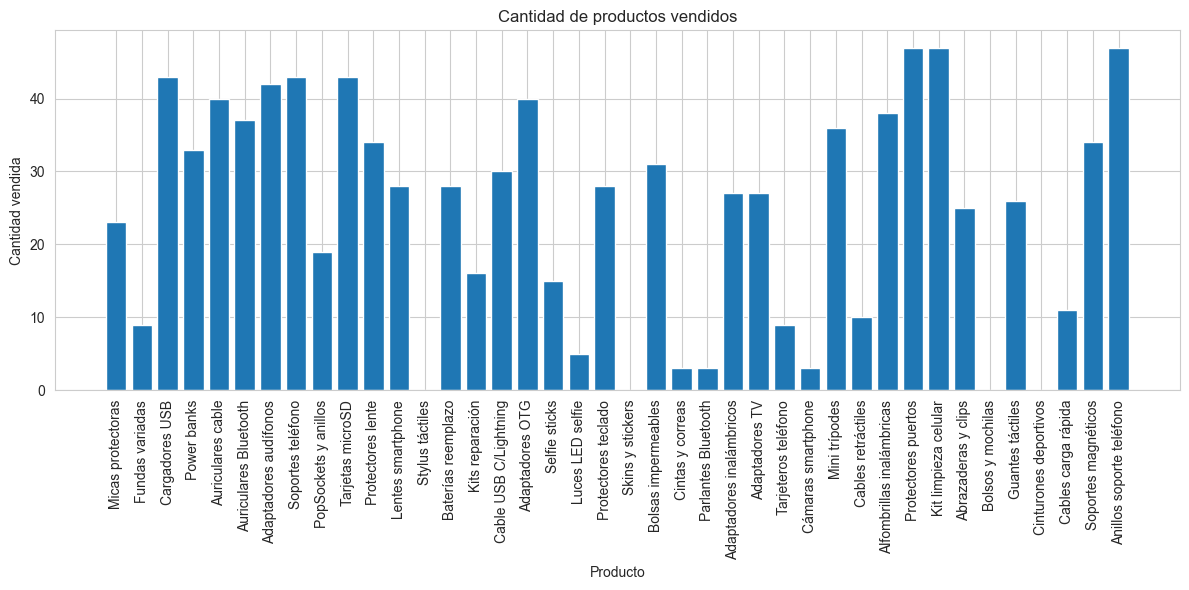

In [5]:
import matplotlib.pyplot as plt

# Gráfico de barras para los productos y sus cantidades vendidas
plt.figure(figsize=(12, 6))
plt.bar(df["Producto"], df["Cantidad vendida"])
plt.xticks(rotation=90)
plt.xlabel("Producto")
plt.ylabel("Cantidad vendida")
plt.title("Cantidad de productos vendidos")
plt.tight_layout()
plt.show()

## Gráfico de barras
Este grafico mostrará cada uno de los productos asi como tambien la escala de medicion de su cantidad vendida, como se puede apreciar hay productos que no fueron vendidos por lo cual no contarán con una barra vertical 

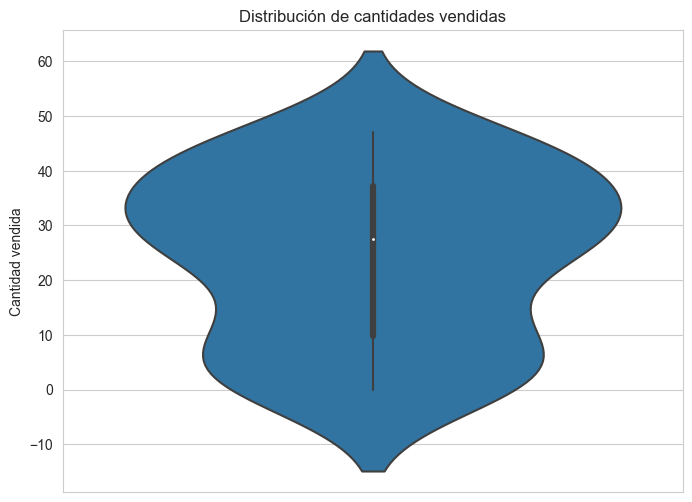

In [6]:
import seaborn as sns

# Gráfico de violín para visualizar la distribución de las cantidades vendidas
plt.figure(figsize=(8, 6))
sns.violinplot(y="Cantidad vendida", data=df)
plt.ylabel("Cantidad vendida")
plt.title("Distribución de cantidades vendidas")
plt.show()


## Gráfico de violín 
Este gráfico representa el volumen del precio de los productos que fueron vendidos es decir mientras mas ancho sea nuestro grafico, en este caso dicha alteracion se ve mucho mejor en el eje Y aproximadamente en 35 lo que quiere decir que tenemos vendidos mas productos con el precio de 35.

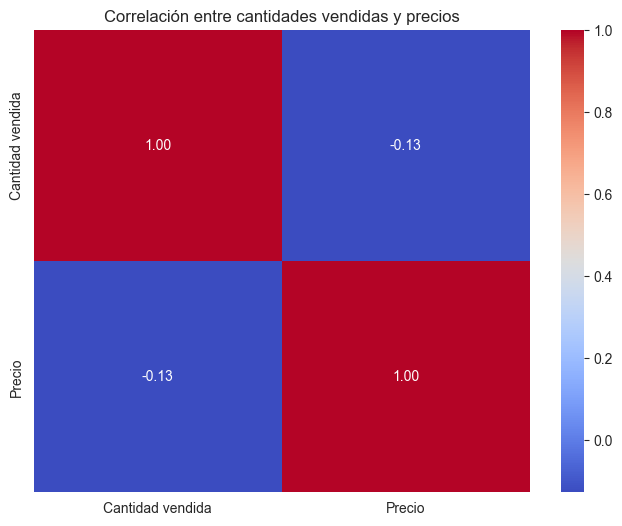

In [7]:
# Crear un mapa de calor para mostrar la correlación entre cantidades vendidas y precios
plt.figure(figsize=(8, 6))
sns.heatmap(df[["Cantidad vendida", "Precio"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlación entre cantidades vendidas y precios")
plt.show()


## Gráfico de correlacion 
Este grafico no nos sirve tanto para el analisis exploratorio de nuestros datos sino que nos sirve para ver que variables se correlacionan entre si para tomarlas como posibles varibles independendientes para realizar nuestro modelo predictivo, en este caso no tenemos una correlacion tan buena ya que cuenta con -0.13 y es correlacion negativa, tenemos que recordar que mientras mas se aproxime a 1, es mucho mejor

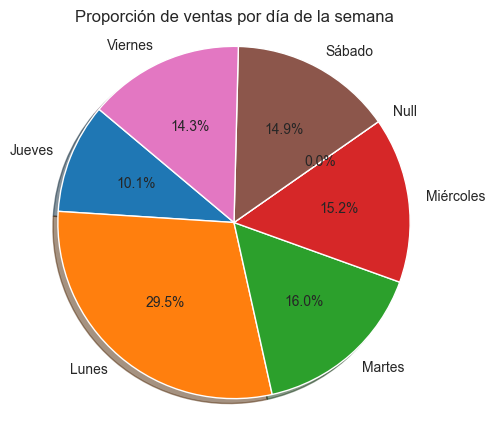

In [8]:
# Gráfico de pastel para mostrar la proporción de ventas por día de la semana
ventas_por_dia = df.groupby("Día de la semana de venta")["Cantidad vendida"].sum()
plt.figure(figsize=(5, 5))
plt.pie(ventas_por_dia, labels=ventas_por_dia.index, autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("Proporción de ventas por día de la semana")
plt.show()

## Gráfico de pastel 
Este grafico nos permite ver y evaluar las proporciones que exiten entre un conjunto de caracteristicas de nuestras variables categoricas que vendrian a ser en este caso los dias de la semana en que los productos fueron vendidos, podemos ver que los lunes y los martes son nuestros mejores dias de venta

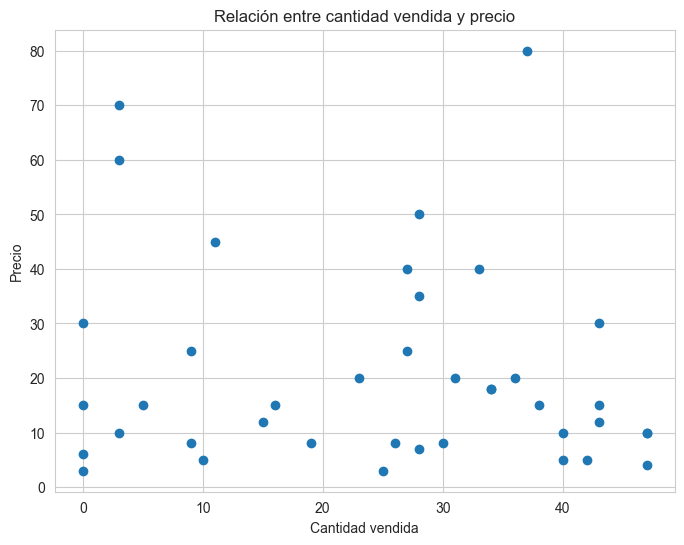

In [9]:
# Gráfico de dispersión (scatter plot) para ver la relación entre cantidad vendida y precio
plt.figure(figsize=(8, 6))
plt.scatter(df["Cantidad vendida"], df["Precio"])
plt.xlabel("Cantidad vendida")
plt.ylabel("Precio")
plt.title("Relación entre cantidad vendida y precio")
plt.show()

## Gráfico de dispersión
Este nos permite ver la relacion de cada unos de nuestros datos en este caso cada punto celeste es uno de nuestros productos y podemos ver la cantidad vendida de nuestro producto y el precio al que esta en venta. 

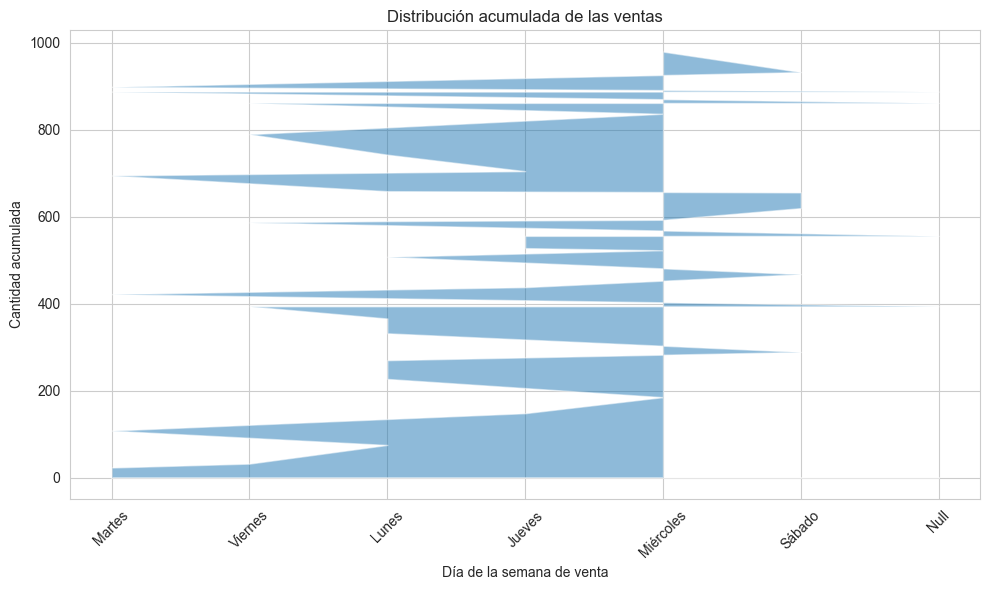

In [10]:
# Gráfico de área para mostrar la distribución acumulada de las ventas en diferentes períodos de tiempo
plt.figure(figsize=(10, 6))
plt.fill_between(df["Día de la semana de venta"], df["Cantidad vendida"].cumsum(), alpha=0.5)
plt.xlabel("Día de la semana de venta")
plt.ylabel("Cantidad acumulada")
plt.title("Distribución acumulada de las ventas")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Gráfico de área 
Este grafico es perfecto para ver la distribucion de nuestras ventas en distintos dias de la semana, esto se puede interpretar como mientras mas ancho es nuestro grafico es que hubo mayor concurrencia de ventas podemos ver que desde los lunes a jueves nuestras ventas tienen su subida, esto nos ayuda mejorar nuestro negocio ya que podriamos necesitar de 2 personas para atender el local durante esos dias. 

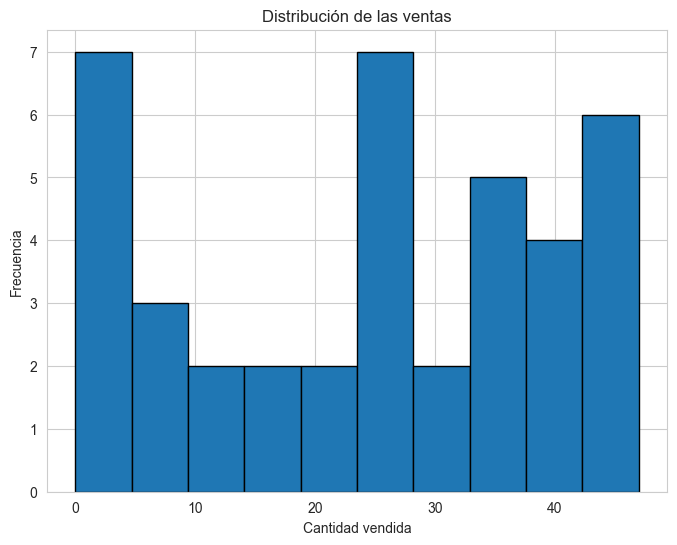

In [11]:
# Gráfico de histograma para visualizar la distribución de las ventas en intervalos
plt.figure(figsize=(8, 6))
plt.hist(df["Cantidad vendida"], bins=10, edgecolor="black")
plt.xlabel("Cantidad vendida")
plt.ylabel("Frecuencia")
plt.title("Distribución de las ventas")
plt.show()

## Gráfico de histograma 
Este grafico nos permite visualizar la frecuencia de la cantidad de nuestros productos que se han vendido, tenemos una escala de 0 a 7 en el eje Y por lo cual si es 7 significa que nuestra cantidad ventida ha alcanzado su mas grande pico.

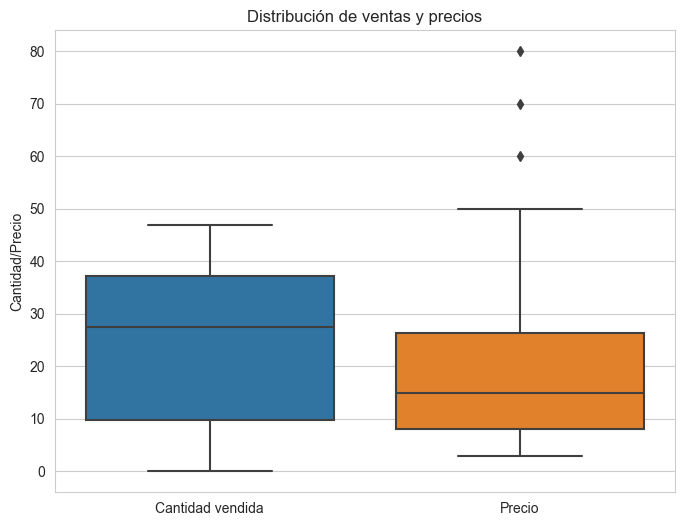

In [12]:
# Gráfico de caja y bigotes (boxplot) para ver la distribución de ventas y precios
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[["Cantidad vendida", "Precio"]])
plt.ylabel("Cantidad/Precio")
plt.title("Distribución de ventas y precios")
plt.show()

## Gráfico de caja o de bigotes
En este caso tenemos dos cajas, la cantidad vendida nos dice que tenemos productos que se han vendido de 10 a 37 veces y vemos que tenemos productos que se han vendido 0 veces por lo cual representan los valores atipicos tambien tenemos unos productos que se han vendido aproximandamente 47 veces (tambien perteneces a los valores atipicos) tenemos una media de 27 productos con esa cantidad vendida. Posteriormente tenemos nuesto precio podemos decir que tenemos una media de precio de nuestros productos de 15 soles, los productos mas baratos cuestan aprox 5 soles y producto mas caro unos 50 soles (valores atipicos)

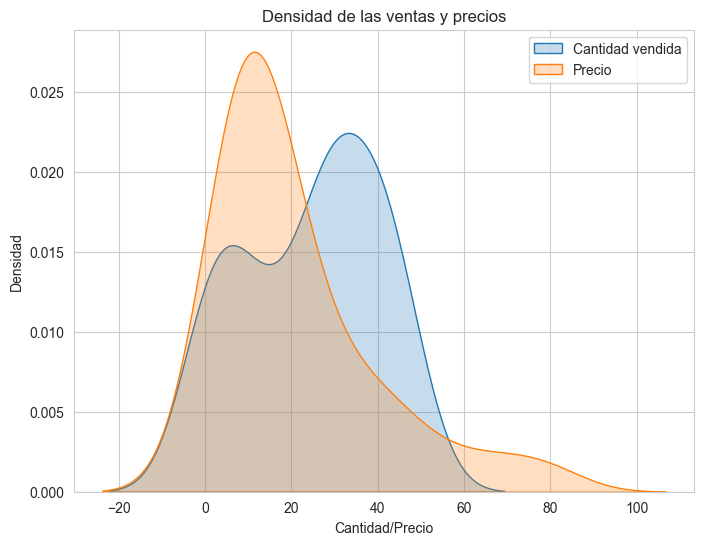

In [13]:
# Gráfico de densidad para ver la densidad de las ventas y precios
plt.figure(figsize=(8, 6))
sns.kdeplot(df["Cantidad vendida"], label="Cantidad vendida", shade=True)
sns.kdeplot(df["Precio"], label="Precio", shade=True)
plt.xlabel("Cantidad/Precio")
plt.ylabel("Densidad")
plt.title("Densidad de las ventas y precios")
plt.legend()
plt.show()

## Grádico de densidad
Este gráfico nos sirve para visualizar como se desenvuelven dos variables, es por ello que se superponen para poder realizar un analisis en nuestro caso estamos analizando las variables cantidad vendida y precio. Este grafico se podria decir que es el antecesor del grafico de violin ya que si duplicamos el area azul como su fuera un espejo nos sale exactamente el grafico de violin, segun esta representacion podemos decir que nuestro punto mas alto de precio se encuentra en 15 soles y la cantidad vendida en 37 unidades

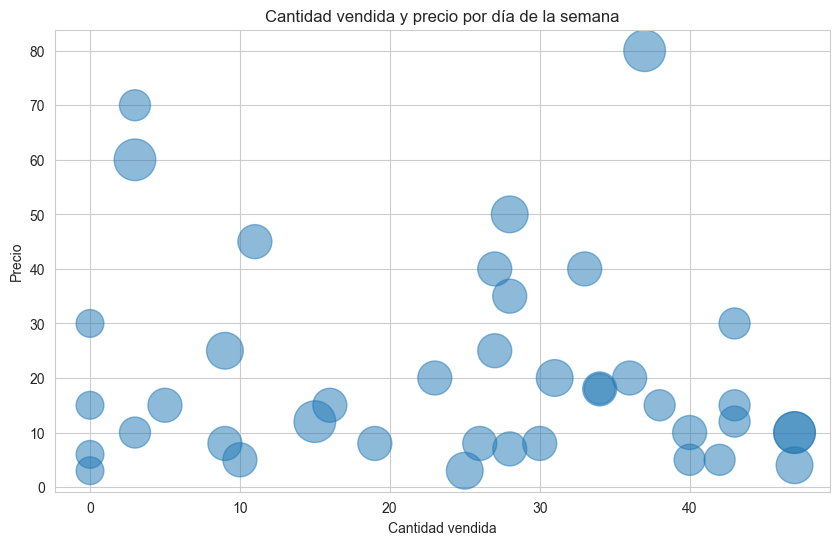

In [14]:
# Gráfico de burbujas para mostrar cantidad vendida, precio y día de la semana al mismo tiempo
plt.figure(figsize=(10, 6))
plt.scatter(df["Cantidad vendida"], df["Precio"], s=df["Día de la semana de venta"].map(len) * 100, alpha=0.5)
plt.xlabel("Cantidad vendida")
plt.ylabel("Precio")
plt.title("Cantidad vendida y precio por día de la semana")
plt.show()

## Gráfico de burbujas 
Este grafico es la representacion de todos nuestro datos, es equiparable a nuestro gráfico de dispersion solo que en este caso podemos ver que algunas variables tienen mas densidad que otras es decir se superponen tambien podemos ver que unas son mas grandes que otras lo que representa un mayor valor en este caso de cantidad vendida

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
df = pd.read_excel("ventas_productos_celulares.xlsx")

# Preparar las variables predictoras (características)
X = df[["Precio", "Cantidad vendida", "Día de la semana de venta"]]
X = pd.get_dummies(X, columns=["Día de la semana de venta"], drop_first=True)

# Preparar la variable objetivo (vendido o no vendido)
y = df["Vendido"]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de Regresión Logística
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = logistic_model.predict(X_test)

# Evaluar el rendimiento del modelo
print("Precisión del modelo de Regresión Logística:", accuracy_score(y_test, y_pred))
print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))


Precisión del modelo de Regresión Logística: 1.0

Matriz de confusión:
[[1 0]
 [0 7]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         7

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



El modelo de Regresión Logística es usado para predecir si un producto en particular será vendido o no, basado en características como el precio, la cantidad vendida previamente y el día de la semana de venta.

## Realizando predicciones

In [16]:
import pickle

# Cargar el modelo entrenado (asegúrate de haber entrenado el modelo previamente)
# logistic_model = LogisticRegression()

# Guardar el modelo en un archivo con pickle
modelo_guardado = "modelo_regresion_logistica.pkl"
with open(modelo_guardado, 'wb') as archivo_modelo:
    pickle.dump(logistic_model, archivo_modelo)

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
df = pd.read_excel("ventas_productos_celulares.xlsx")

# Preparar las variables predictoras (características)
X = df[["Precio", "Cantidad vendida", "Día de la semana de venta"]]
X = pd.get_dummies(X, columns=["Día de la semana de venta"], drop_first=True)

# Preparar la variable objetivo (vendido o no vendido)
y = df["Vendido"]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de Regresión Logística
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = logistic_model.predict(X_test)

# Evaluar el rendimiento del modelo
print("Precisión del modelo de Regresión Logística:", accuracy_score(y_test, y_pred))
print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))


Precisión del modelo de Regresión Logística: 1.0

Matriz de confusión:
[[1 0]
 [0 7]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         7

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



In [19]:
# Guardar el modelo en un archivo
import joblib
modelo_guardado = 'modelo_regresion_logistica.pkl'
joblib.dump(logistic_model, modelo_guardado)

['modelo_regresion_logistica.pkl']

In [45]:
import pandas as pd
import joblib

# Cargar el modelo entrenado
modelo_cargado = joblib.load('modelo_regresion_logistica.pkl')

# Ejemplo de nuevos datos de entrada
nuevo_producto = {
    "Precio": 20,
    "Cantidad vendida": 10,
    "Día de la semana de venta_Lunes": 1,
    "Día de la semana de venta_Martes": 0,
    "Día de la semana de venta_Miércoles": 0,
    "Día de la semana de venta_Jueves": 0,
    "Día de la semana de venta_Viernes": 0,
    "Día de la semana de venta_Sábado": 0,
    # Agregar la columna "Día de la semana de venta_Null" y establecer su valor en 0
    "Día de la semana de venta_Null": 0
}

# Convertir los nuevos datos en un DataFrame
nuevo_producto_df = pd.DataFrame([nuevo_producto])

# Revisar si todas las columnas necesarias están presentes en el conjunto de nuevos datos
columnas_faltantes = [col for col in X_train.columns if col not in nuevo_producto_df.columns]

# Agregar las columnas faltantes y establecer sus valores en 0
for columna in columnas_faltantes:
    nuevo_producto_df[columna] = 0

# Reordenar las columnas para que coincidan con el orden utilizado durante el entrenamiento
nuevo_producto_df = nuevo_producto_df[X_train.columns]

# Realizar la predicción utilizando el modelo cargado
prediccion_nuevo_producto = modelo_cargado.predict(nuevo_producto_df)

# Resultado de la predicción
if prediccion_nuevo_producto[0] == 1:
    print("El producto será vendido.")
else:
    print("El producto no será vendido.")


El producto será vendido.
